# Part 1

## First Question

First, I was asked to present the data contained in the archives in time domain. Since we have the acceleration in three axis, $x, y, z$, we can find scalar acceleration by doing:
$$
|a| = \sqrt{a_x^2+a_y^2+a_z^2}
$$

Let's do this on the code, for the first archive. After that I'll create a function to do the same in the another archives data.

In [1]:
archives = ['1623535615-3006-IAJ9206.csv', '1624040490-2957-NAI1549.csv', '1624374799-3006-MYS2071.csv', '1624962426-3006-NAH4736.csv']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
archive = archives[0]
df = pd.read_csv('part_1/'+archive)
df.head()

,x,y,z
0,-1.003174,-0.097778,-0.017334
1,-0.993591,-0.084778,-0.009766
2,-0.964844,-0.048462,0.062012
3,-0.868591,-0.010437,0.103577
4,-0.885498,-0.041992,0.078003


Creating the new column, containing the scalar acceleration:

In [4]:
#getting axis values
xs = df.x
ys = df.y
zs = df.z 

a =  [9.806*np.sqrt((x**2)+(y**2)+(z**2)) for (x, y, z) in zip(xs, ys, zs)] #list comprehension

df['a'] = a #new column, acceleration
df.head()

,x,y,z,a
0,-1.003174,-0.097778,-0.017334,9.885201
1,-0.993591,-0.084778,-0.009766,9.779027
2,-0.964844,-0.048462,0.062012,9.492681
3,-0.868591,-0.010437,0.103577,8.578361
4,-0.885498,-0.041992,0.078003,8.726539


Let's create the time column too:

In [5]:
import datetime as dt
import time

time_infos = archive.split('-')
start_unix = time_infos[0]
start = time.strftime("%Y-%m-%d  %H:%M:%S", time.localtime(int(start_unix)))
offset = int(time_infos[1])
timestamps=np.linspace(int(start_unix),int(start_unix)+int(offset),len(a))
dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
df['dates'] = dates

name = time_infos[-1][:-4]
df.head()

,x,y,z,a,dates
0,-1.003174,-0.097778,-0.017334,9.885201,2021-06-12 19:06:55.000000
1,-0.993591,-0.084778,-0.009766,9.779027,2021-06-12 19:06:55.603736
2,-0.964844,-0.048462,0.062012,9.492681,2021-06-12 19:06:56.207471
3,-0.868591,-0.010437,0.103577,8.578361,2021-06-12 19:06:56.811207
4,-0.885498,-0.041992,0.078003,8.726539,2021-06-12 19:06:57.414943


And now, we can plot that using acceleration values:

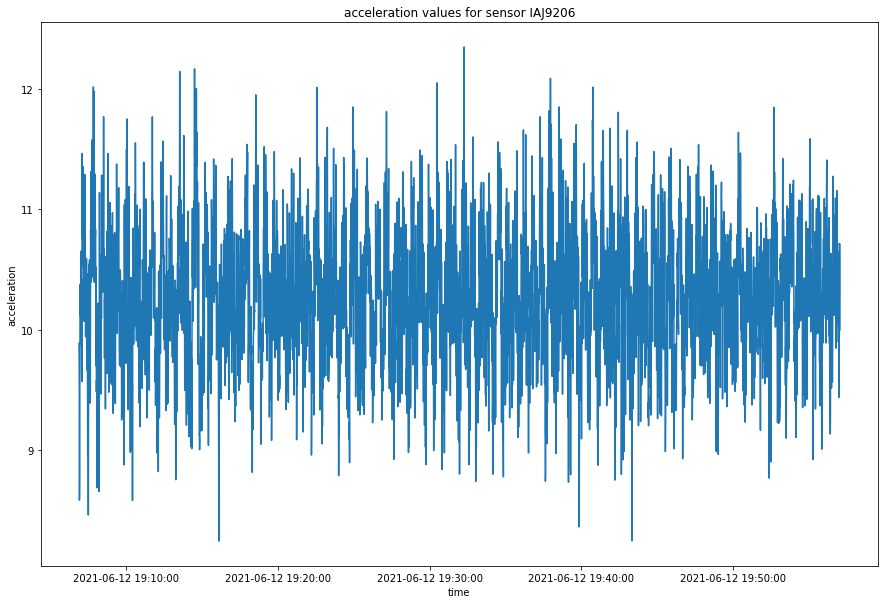

In [6]:
import matplotlib.dates as md

plt.figure(figsize=(15,10))
plt.xlabel('time')
plt.ylabel('acceleration')

ax=plt.gca()
x_scale = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(x_scale)

plt.title('acceleration values for sensor %s'%(name))

plt.plot(df.dates, df.a)
plt.show()

That's the time plot for the first archive. Let's do the same for the others, I'll use create functions to avoid redoing the same code:

In [7]:
def create_df(archive):
    df = pd.read_csv('part_1/'+archive)
    
    #getting axis values
    xs = df.x
    ys = df.y
    zs = df.z 

    a = [9.806*np.sqrt((x**2)+(y**2)+(z**2)) for (x, y, z) in zip(xs, ys, zs)] #list comprehension

    df['a'] = a #new column, acceleration

    time_infos = archive.split('-')
    start_unix = time_infos[0]
    start = time.strftime("%Y-%m-%d  %H:%M:%S", time.localtime(int(start_unix)))
    offset = int(time_infos[1])
    timestamps=np.linspace(int(start_unix),int(start_unix)+int(offset),len(a))
    dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
    df['dates'] = dates
    
    name = time_infos[-1][:-4]
    return df, name

For the second sensor:

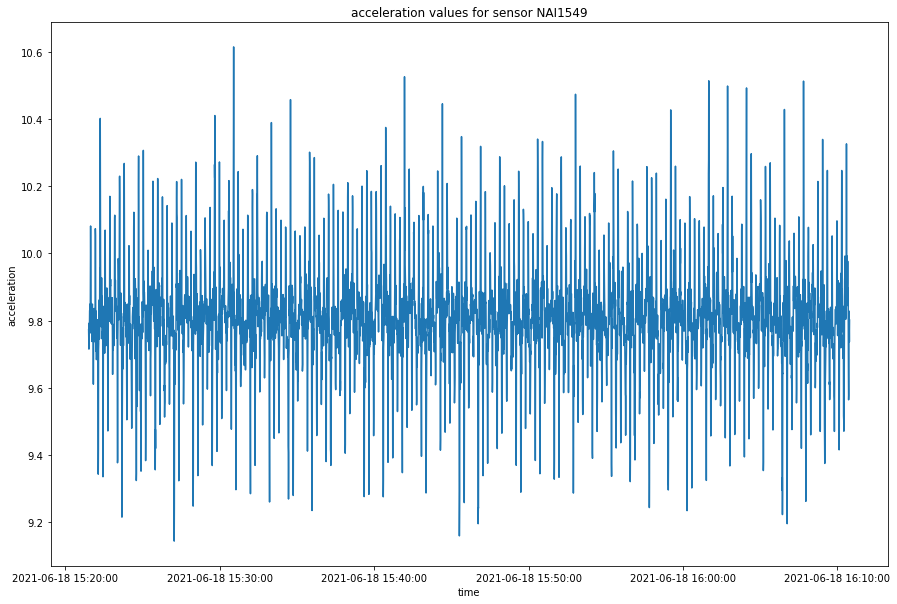

In [8]:
df, name = create_df(archives[1])

plt.figure(figsize=(15,10))
plt.xlabel('time')
plt.ylabel('acceleration')

ax=plt.gca()
x_scale = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(x_scale)

plt.title('acceleration values for sensor %s'%(name))

plt.plot(df.dates, df.a)
plt.show()

For the third sensor:

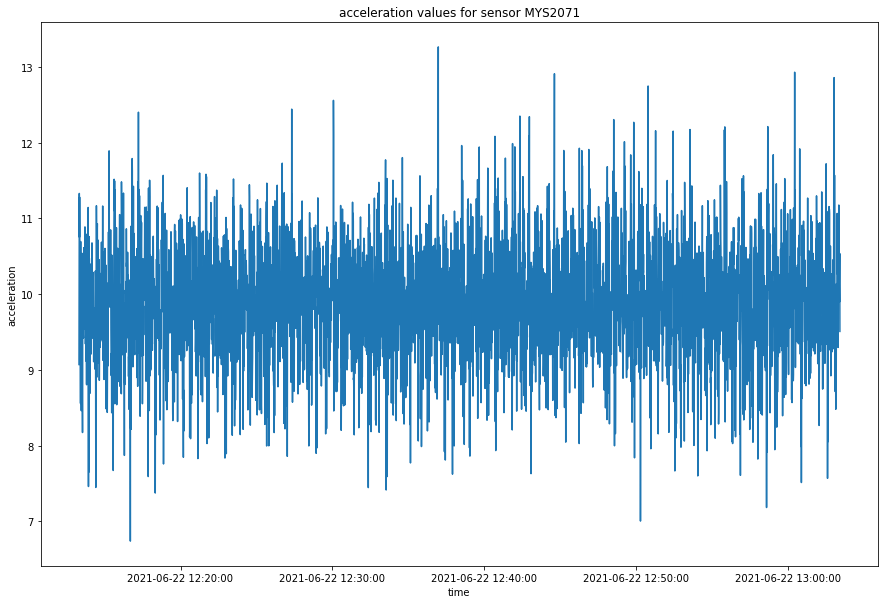

In [9]:
df, name = create_df(archives[2])

plt.figure(figsize=(15,10))
plt.xlabel('time')
plt.ylabel('acceleration')

ax=plt.gca()
x_scale = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(x_scale)

plt.title('acceleration values for sensor %s'%(name))

plt.plot(df.dates, df.a)
plt.show()

For the fourth sensor:

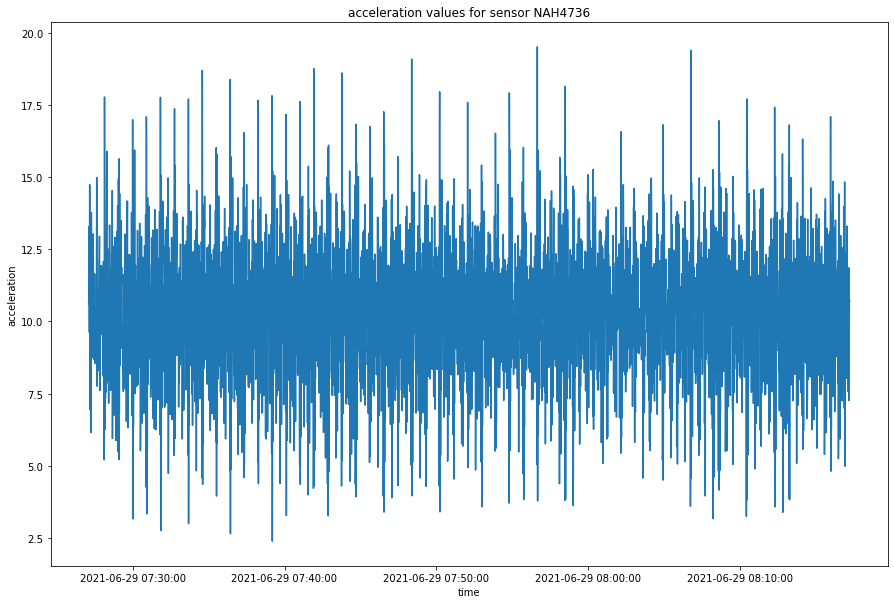

In [10]:
df, name = create_df(archives[3])

plt.figure(figsize=(15,10))
plt.xlabel('time')
plt.ylabel('acceleration')

ax=plt.gca()
x_scale = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(x_scale)

plt.title('acceleration values for sensor %s'%(name))

plt.plot(df.dates, df.a)
plt.show()

Now, the first question is done.

## Second question

Now, I was asked to do the same thing but for frequency domain. To do that, I'll need to use fft to pass the acceleration data to frequency and change the x axis too. Let's adapt the function:

In [11]:
from scipy.fft import rfft, rfftfreq, fftfreq, fftfreq

def create_df_freq(archive):
    df = pd.read_csv('part_1/'+archive)
    
    #getting axis values
    xs = df.x
    ys = df.y
    zs = df.z 

    a = [9.806*np.sqrt((x**2)+(y**2)+(z**2)) for (x, y, z) in zip(xs, ys, zs)] #list comprehension
    af = rfft(a)

    a_freq = af #new column, acceleration

    time_infos = archive.split('-')
    start_unix = time_infos[0]
    offset = int(time_infos[1])
    
    freq = rfftfreq(len(a), 1/offset)
    
    name = time_infos[-1][:-4]
    return freq, a_freq, name

The graphic will be in frequency domain and we will use as sampling rate the given by the name of the archive. Also, the plot will be of the magnitude of the fourier transform, since it is a complex number. The plot of the four archives follows below:

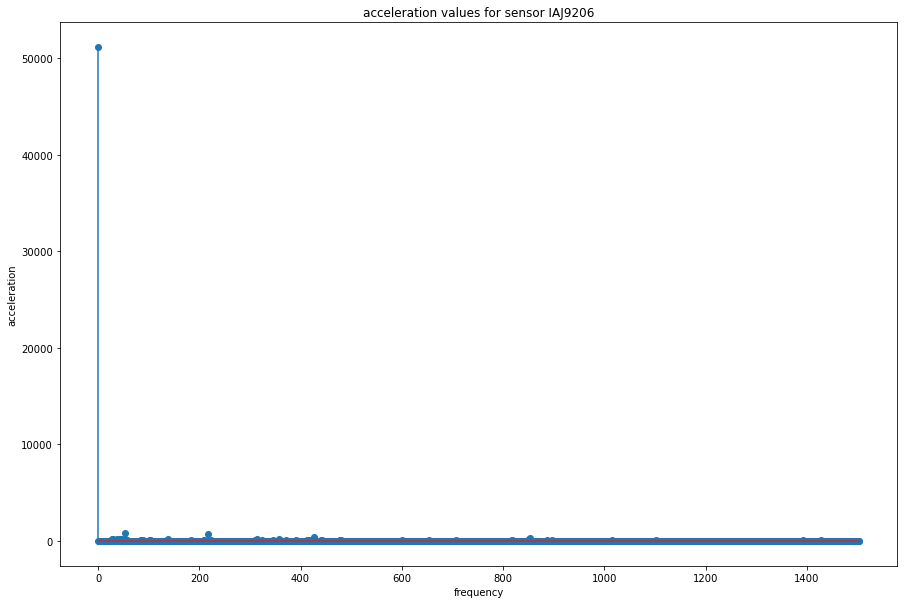

In [12]:
freq, a_freq, name= create_df_freq(archives[0])
plt.figure(figsize=(15,10))
plt.xlabel('frequency')
plt.ylabel('acceleration')

plt.title('acceleration values for sensor %s'%(name))

plt.stem(freq, abs(a_freq))
plt.show()

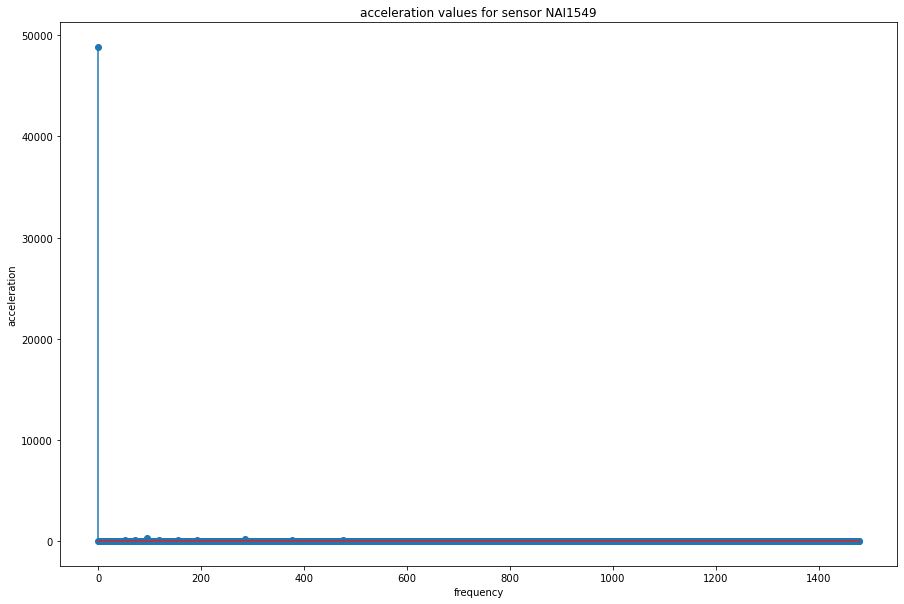

In [13]:
freq, a_freq, name= create_df_freq(archives[1])
plt.figure(figsize=(15,10))
plt.xlabel('frequency')
plt.ylabel('acceleration')

plt.title('acceleration values for sensor %s'%(name))

plt.stem(freq, abs(a_freq))
plt.show()

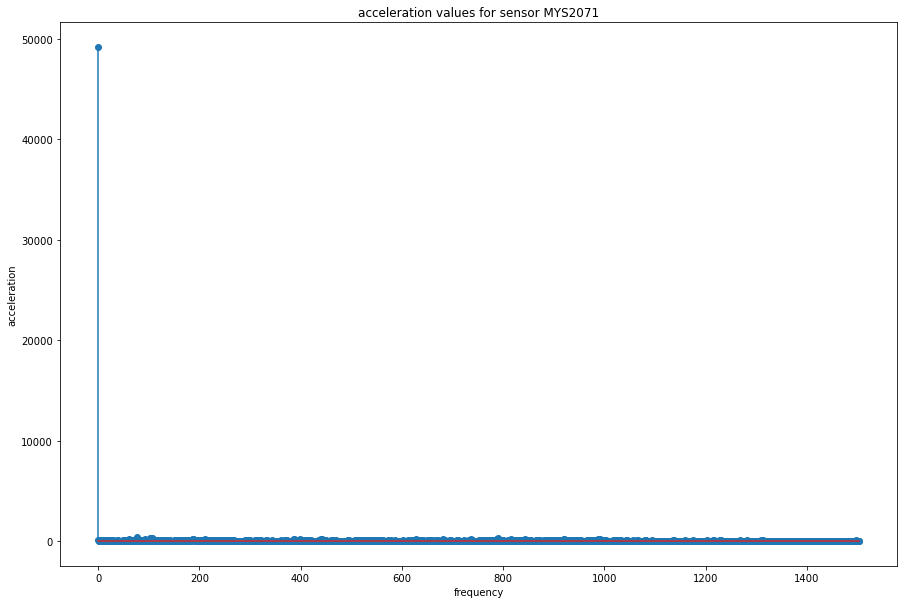

In [14]:
freq, a_freq, name= create_df_freq(archives[2])
plt.figure(figsize=(15,10))
plt.xlabel('frequency')
plt.ylabel('acceleration')

plt.title('acceleration values for sensor %s'%(name))

plt.stem(freq, abs(a_freq))
plt.show()

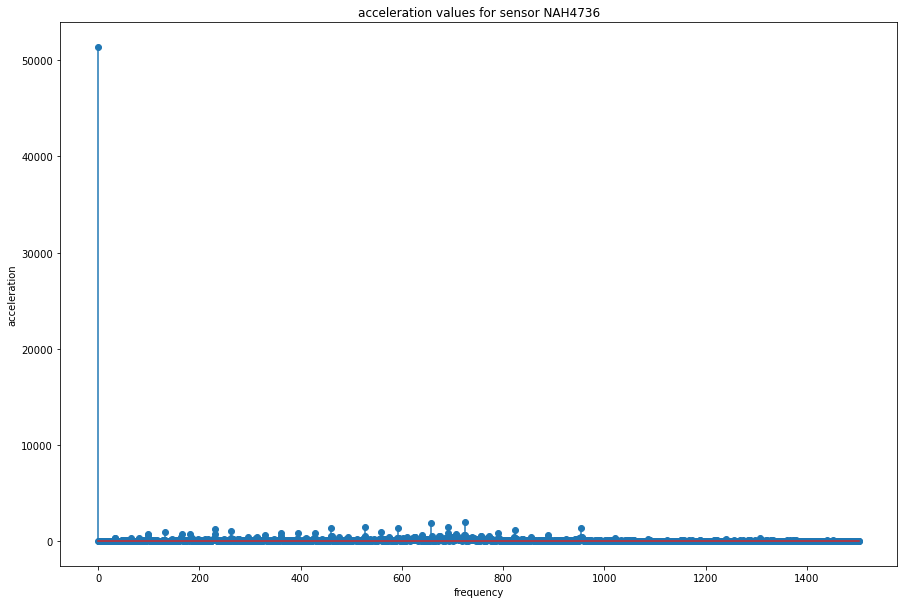

In [15]:
freq, a_freq, name= create_df_freq(archives[3])
plt.figure(figsize=(15,10))
plt.xlabel('frequency')
plt.ylabel('acceleration')

plt.title('acceleration values for sensor %s'%(name))

plt.stem(freq, abs(a_freq))
plt.show()

## Third question

For all the cases, we can apply a low band pass filter, changing only the threshold of frequency. We can see in the four cases that we have magnitude in acceleration concentrated in a interval. Let's analyze the fourth case, which we have:

- 3006ms of sample period (T)
- 4980 samples
- 4980/3.006 samples/sec = 1656.687 (fs)

We can pass, at most, the signal with 1000Hz. As we saw in the previous questions, the signals with more than 1000Hz are not with high magnitude, so I'll interpret it as a noise.

In [16]:
df = pd.read_csv('part_1/'+archives[3])
print('samples:',len(df))
print('samples per sec:',len(df)/3.006)

samples: 4980
samples per sec: 1656.686626746507


I'll design the filter using butterfilter, from scipy. We have the period, the sample rate and the desired cutoff in hertz. Also, we will need the nyquist rate, which is $0.5 * fs$, and is the minimum rate at which a finite bandwith signal needs to be sampled to retain all the information. Also, I'll approximate the data as a 2nd order equation.

In [17]:
from scipy.signal import butter, lfilter

T = 3.006
fs = 1656.687
cutoff = 1000
nyq = 0.5*fs
order = 2

Let's do the filtering and plot the result in time domain:

In [18]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low',fs=fs, analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def create_df_filtered(archive):
    df = pd.read_csv('part_1/'+archive)
    
    #getting axis values
    xs = df.x
    ys = df.y
    zs = df.z 

    a = [9.806*np.sqrt((x**2)+(y**2)+(z**2)) for (x, y, z) in zip(xs, ys, zs)] #list comprehension

    df['a'] = butter_lowpass_filter(a, cutoff, fs, order) #new column, acceleration

    time_infos = archive.split('-')
    start_unix = time_infos[0]
    start = time.strftime("%Y-%m-%d  %H:%M:%S", time.localtime(int(start_unix)))
    offset = int(time_infos[1])
    timestamps=np.linspace(int(start_unix),int(start_unix)+int(offset),len(a))
    dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
    df['dates'] = dates
    
    name = time_infos[-1][:-4]
    return df, name

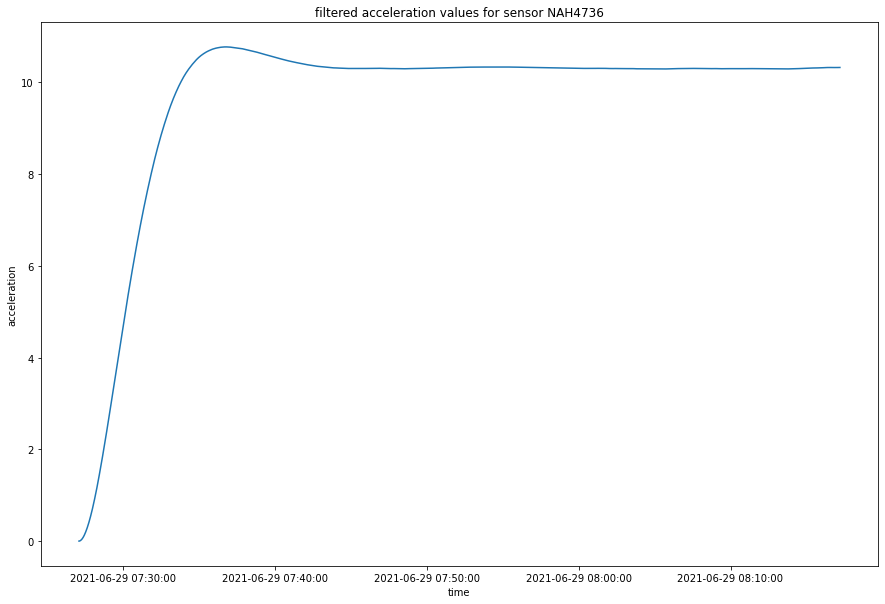

In [19]:
df, name = create_df_filtered(archives[3])

plt.figure(figsize=(15,10))
plt.xlabel('time')
plt.ylabel('acceleration')

ax=plt.gca()
x_scale = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(x_scale)

plt.title('filtered acceleration values for sensor %s'%(name))

plt.plot(df.dates, df.a)
plt.show()

There is no doubt that is clearly a different signal! The noise was almost full removed. Now we can clearly see the trend and what is happening with the acceleration.

Doing the same for another sensor. I'll redefine the function, to avoid using constant parameter to fs and period, for example:

In [20]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low',fs=fs, analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def create_df_filtered(archive, cutoff):
    df = pd.read_csv('part_1/'+archive)
    
    time_infos = archive.split('-')
    start_unix = time_infos[0]
    start = time.strftime("%Y-%m-%d  %H:%M:%S", time.localtime(int(start_unix)))
    offset = int(time_infos[1])
    timestamps=np.linspace(int(start_unix),int(start_unix)+int(offset),len(df))
    dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
    df['dates'] = dates
    
    T = offset/1000
    samples = len(df)
    fs = samples/T
    nyq = 0.5*fs
    order = 2
    
    #getting axis values
    xs = df.x
    ys = df.y
    zs = df.z 

    a = [9.806*np.sqrt((x**2)+(y**2)+(z**2)) for (x, y, z) in zip(xs, ys, zs)] #list comprehension

    df['a'] = butter_lowpass_filter(a, cutoff, fs, order) #new column, acceleration

    
    name = time_infos[-1][:-4]
    return df, name

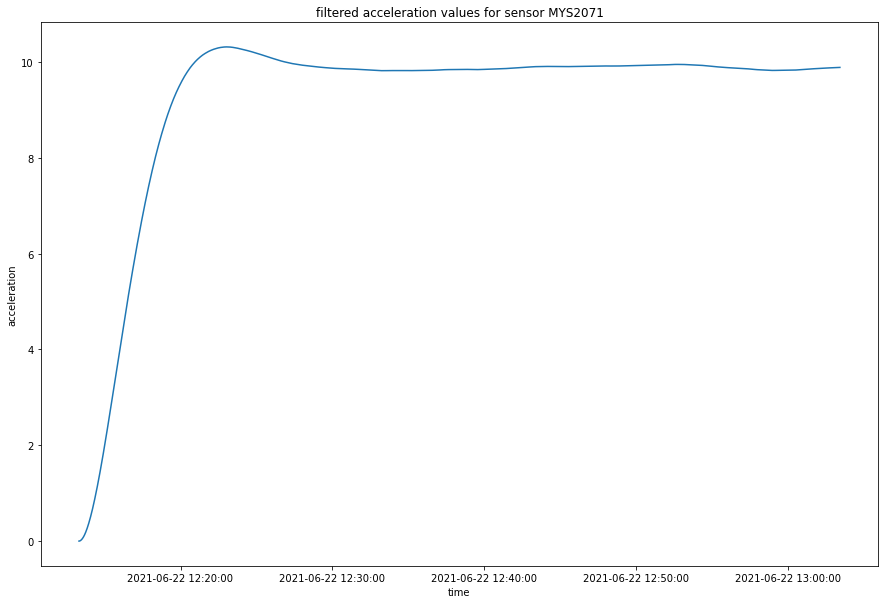

In [21]:
df, name = create_df_filtered(archives[2], 1000)

plt.figure(figsize=(15,10))
plt.xlabel('time')
plt.ylabel('acceleration')

ax=plt.gca()
x_scale = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(x_scale)

plt.title('filtered acceleration values for sensor %s'%(name))

plt.plot(df.dates, df.a)
plt.show()

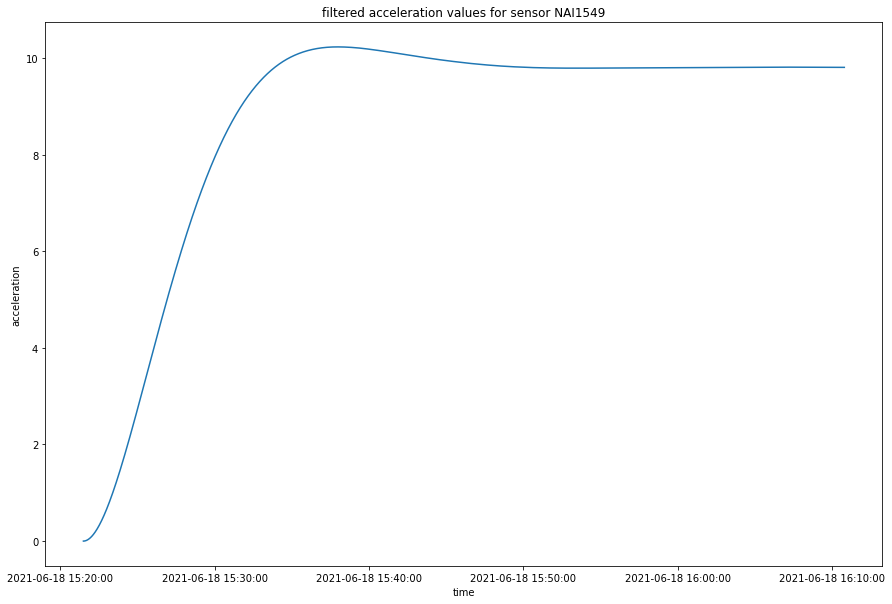

In [22]:
df, name = create_df_filtered(archives[1], 600)

plt.figure(figsize=(15,10))
plt.xlabel('time')
plt.ylabel('acceleration')

ax=plt.gca()
x_scale = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(x_scale)

plt.title('filtered acceleration values for sensor %s'%(name))

plt.plot(df.dates, df.a)
plt.show()

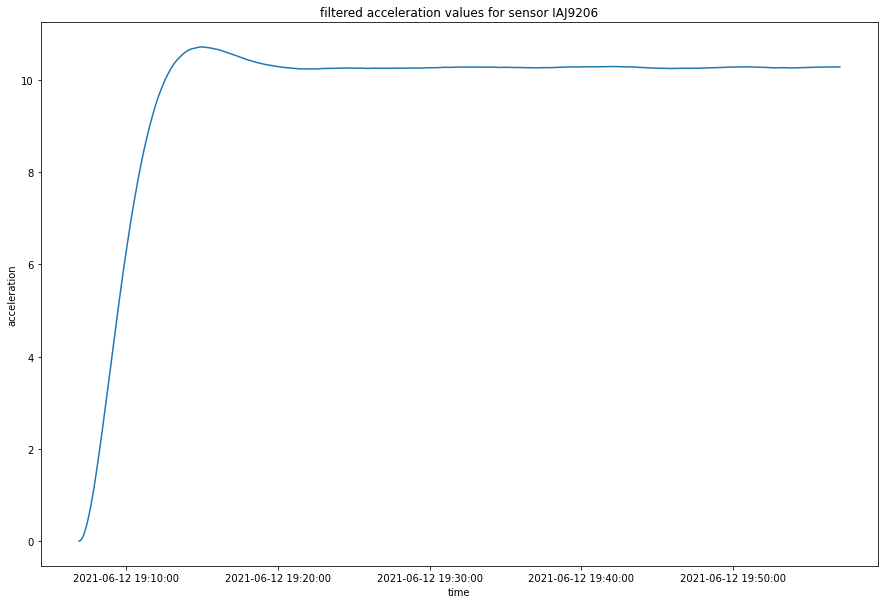

In [23]:
df, name = create_df_filtered(archives[0], 1200)

plt.figure(figsize=(15,10))
plt.xlabel('time')
plt.ylabel('acceleration')

ax=plt.gca()
x_scale = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(x_scale)

plt.title('filtered acceleration values for sensor %s'%(name))

plt.plot(df.dates, df.a)
plt.show()

A good exercise is variate the values of the cutoff. I put the ones that I saw in the plot of frequency domain (question 2) that cut more of noise of their respective signals.

# Part 2

Now, I need to analyze the data of the two archives, one containing the name and data of the assets and other containing their collects.

## Question 1

I'll start by merging assets and collects dataframe. This will provide the information of each asset with its collect. After that, I can do some plot to see the data.

In [55]:
df_assets = pd.read_csv('part_2/assets.csv')
df_collects = pd.read_csv('part_2/collects.csv')

In [56]:
sensorId = [sensor[2:-2] for sensor in df_assets.sensors]
df_assets.drop(['sensors'], axis=1)
df_assets['sensorId'] = sensorId

In [59]:
df = df_collects.merge(df_assets, on='sensorId')

In [63]:
df.dtypes

_id_x                          object
createdAt_x                    object
params.accelRMS.x             float64
params.accelRMS.y             float64
params.accelRMS.z             float64
params.duration               float64
params.sampRate               float64
params.timeStart              float64
params.velRMS.x               float64
params.velRMS.y               float64
params.velRMS.z               float64
sensorId                       object
temp                          float64
_id_y                          object
company                        object
createdAt_y                    object
description                    object
model                          object
modelType                      object
name                           object
sensors                        object
specifications.axisX           object
specifications.axisY           object
specifications.axisZ           object
specifications.maxDowntime    float64
specifications.maxTemp        float64
specificatio

First, I'll create Velocity and Acceleration columns, since in the dataset these informations are for each axis.

In [66]:
def find_values(df, column):
    xs = df['params.'+column+'.x']
    ys = df['params.'+column+'.y']
    zs = df['params.'+column+'.z']

    new = [np.sqrt((x**2)+(y**2)+(z**2)) for (x, y, z) in zip(xs, ys, zs)]
    
    return new

df['accel'] = find_values(df, 'accelRMS')
df['vel'] = find_values(df, 'velRMS')

Now I'll plot the mean values of Velocity and Acceleration for each asset:

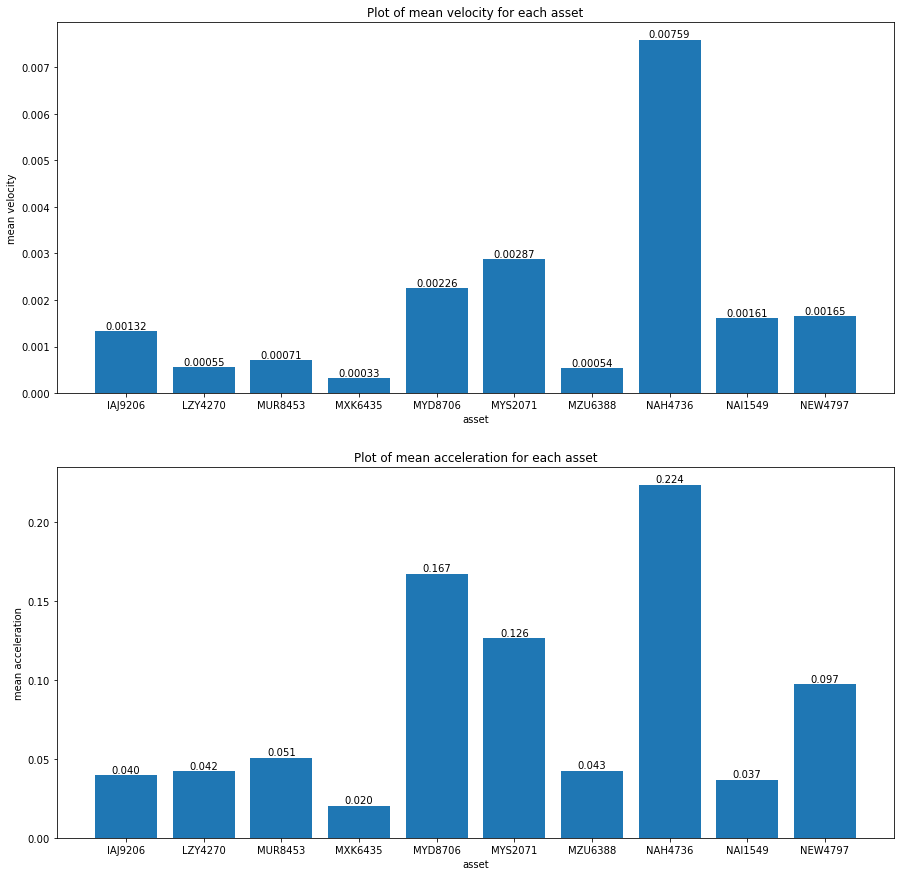

In [97]:
plot_df = df.groupby('sensorId')[['accel', 'vel']].mean()



figure, axis = plt.subplots(2,1, figsize=(15,15))

plt.xticks(range(len(plot_df.index)), list(plot_df.index))

axis[0].set_xlabel('asset')
axis[0].set_ylabel('mean velocity')
axis[0].set_title('Plot of mean velocity for each asset')
plot = axis[0].bar(plot_df.index, plot_df['vel'])
for rectangle in plot:
    height = rectangle.get_height()
    axis[0].text(rectangle.get_x() + rectangle.get_width() /2., 1.002 *
        height, '%.5f' % float(height), ha='center', va = 'bottom')


axis[1].set_xlabel('asset')
axis[1].set_ylabel('mean acceleration')
axis[1].set_title('Plot of mean acceleration for each asset')
plot = axis[1].bar(plot_df.index, plot_df['accel'])
for rectangle in plot:
    height = rectangle.get_height()
    axis[1].text(rectangle.get_x() + rectangle.get_width() /2., 1.002 *
        height, '%.3f' % float(height), ha='center', va = 'bottom')
    
plt.show()

Now I'll plot velocity and acceleration in line chart, for each asset, using subplots. Due to that, I'll parse the datetime column from iso format to date format.

In [165]:
time_df = df[['createdAt_x', 'sensorId', 'accel', 'vel']]

In [166]:
time_df['createdAt_x'] = pd.to_datetime(time_df['createdAt_x'])

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


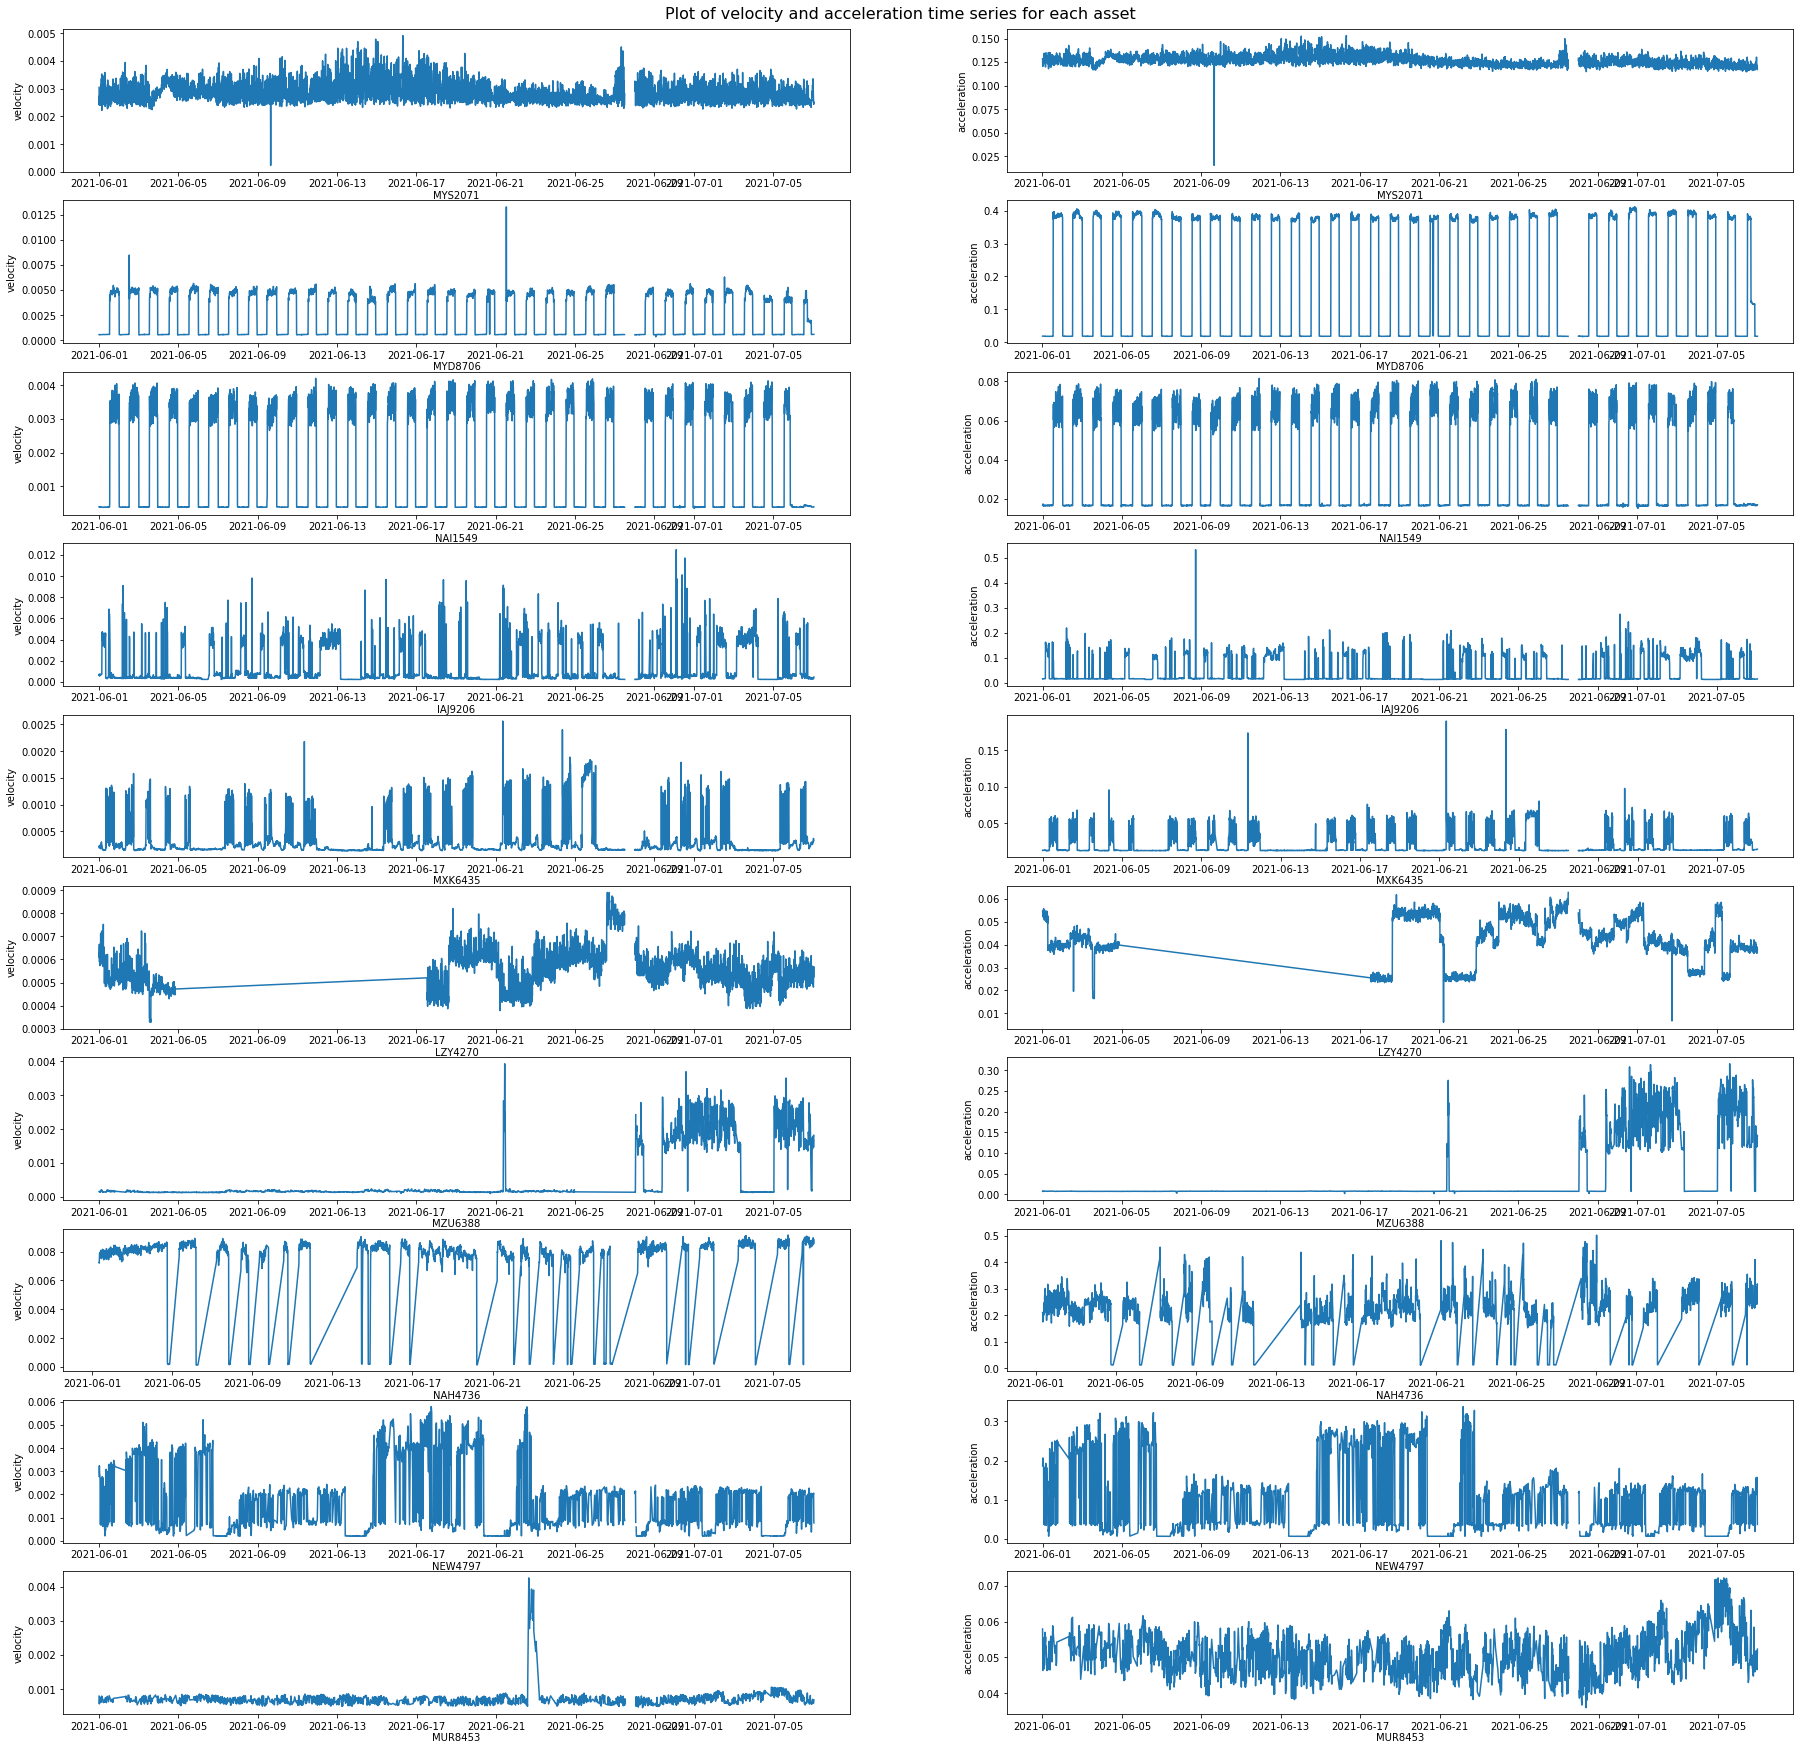

In [171]:
assets = list(time_df['sensorId'].value_counts().index)


figure, axis = plt.subplots(len(assets),2, figsize=(31,31))



for (asset,ax) in zip(assets, axis):
    subset_df = time_df[time_df['sensorId'] == asset]
    ax[0].set_xlabel(asset)
    ax[0].xaxis.set_label_coords(0.5, -0.13)
    ax[0].set_ylabel('velocity')
    #ax.set_title('Plot of mean velocity for each asset')
    ax[0].plot(subset_df['createdAt_x'], subset_df['vel'])

    ax[1].set_xlabel(asset)
    ax[1].xaxis.set_label_coords(0.5, -0.13)
    ax[1].set_ylabel('acceleration')
    #ax.set_title('Plot of mean velocity for each asset')
    ax[1].plot(subset_df['createdAt_x'], subset_df['accel'])

figure.suptitle('Plot of velocity and acceleration time series for each asset', fontsize=16,y=0.89)
plt.show()

And now I'll do the same, but with a scatterplot to analyze the two variables.

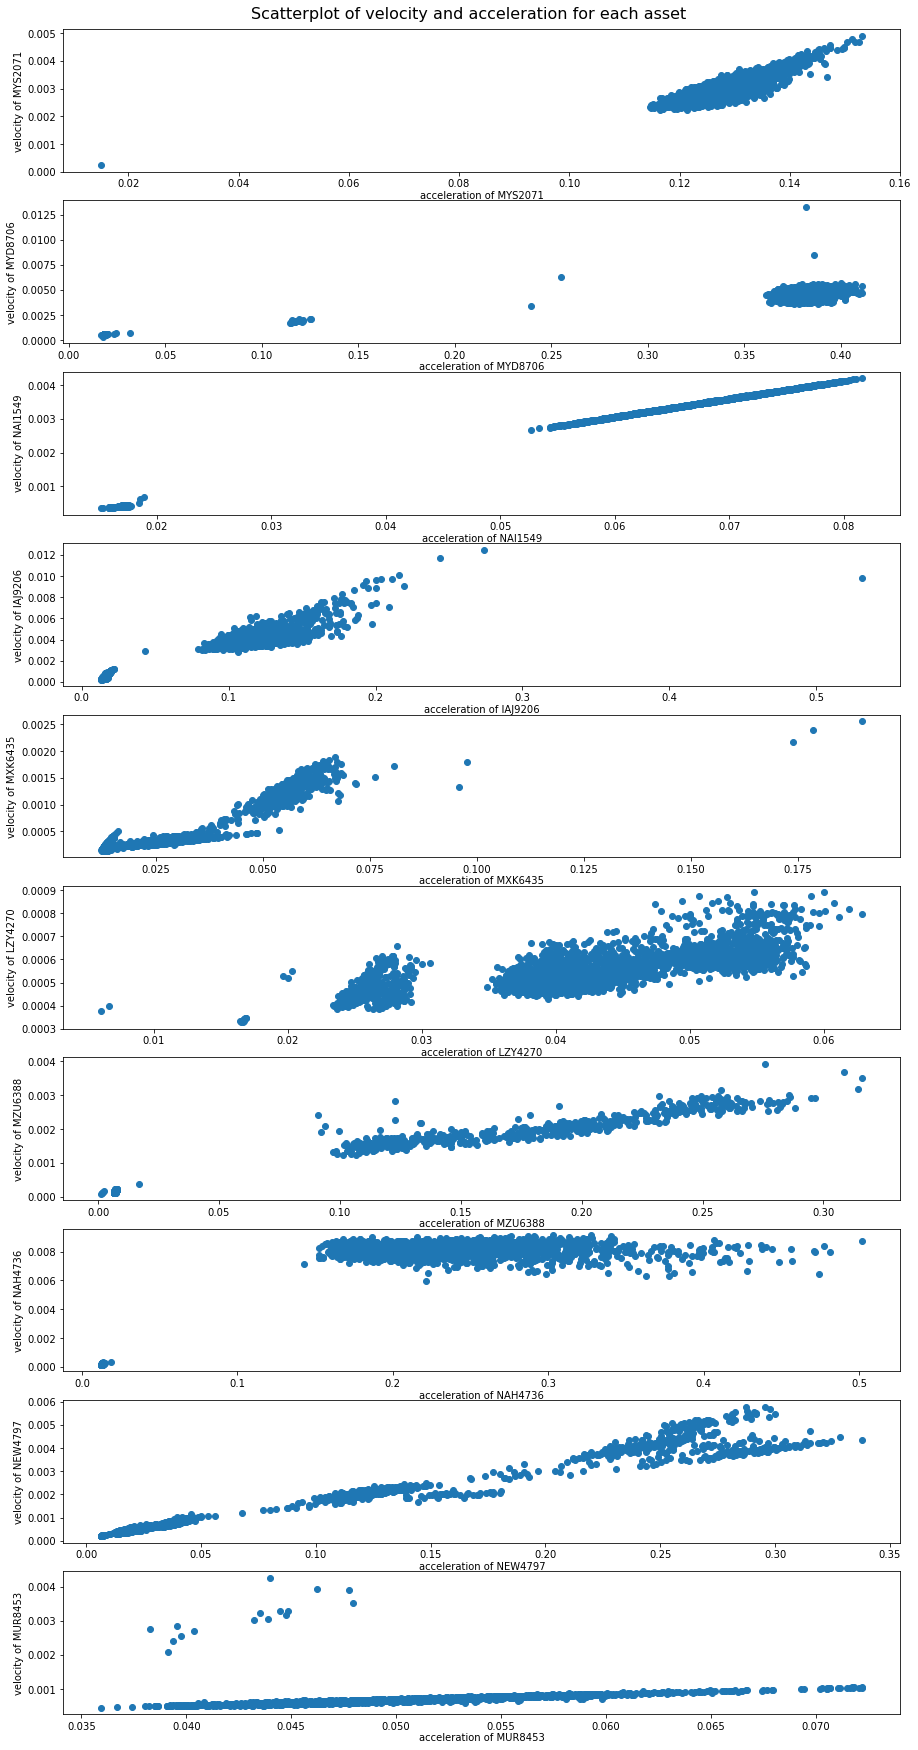

In [177]:
figure, axis = plt.subplots(len(assets),1, figsize=(15,31))



for (asset,ax) in zip(assets, axis):
    subset_df = time_df[time_df['sensorId'] == asset]
    ax.set_xlabel('acceleration of %s'%(asset))
    ax.xaxis.set_label_coords(0.5, -0.13)
    ax.set_ylabel('velocity of %s'%(asset))
    #ax.set_title('Plot of mean velocity for each asset')
    ax.scatter(subset_df['accel'], subset_df['vel'])

    
figure.suptitle('Scatterplot of velocity and acceleration for each asset', fontsize=16,y=0.89)
plt.show()

Now I'll analyze the information of each asset. For this, it will be a good approach graph bars of each specification.

In [178]:
df_assets.dtypes

_id                            object
company                        object
createdAt                      object
description                    object
model                          object
modelType                      object
name                           object
sensors                        object
specifications.axisX           object
specifications.axisY           object
specifications.axisZ           object
specifications.maxDowntime    float64
specifications.maxTemp        float64
specifications.power          float64
specifications.rpm            float64
specifications.workdays        object
sensorId                       object
dtype: object

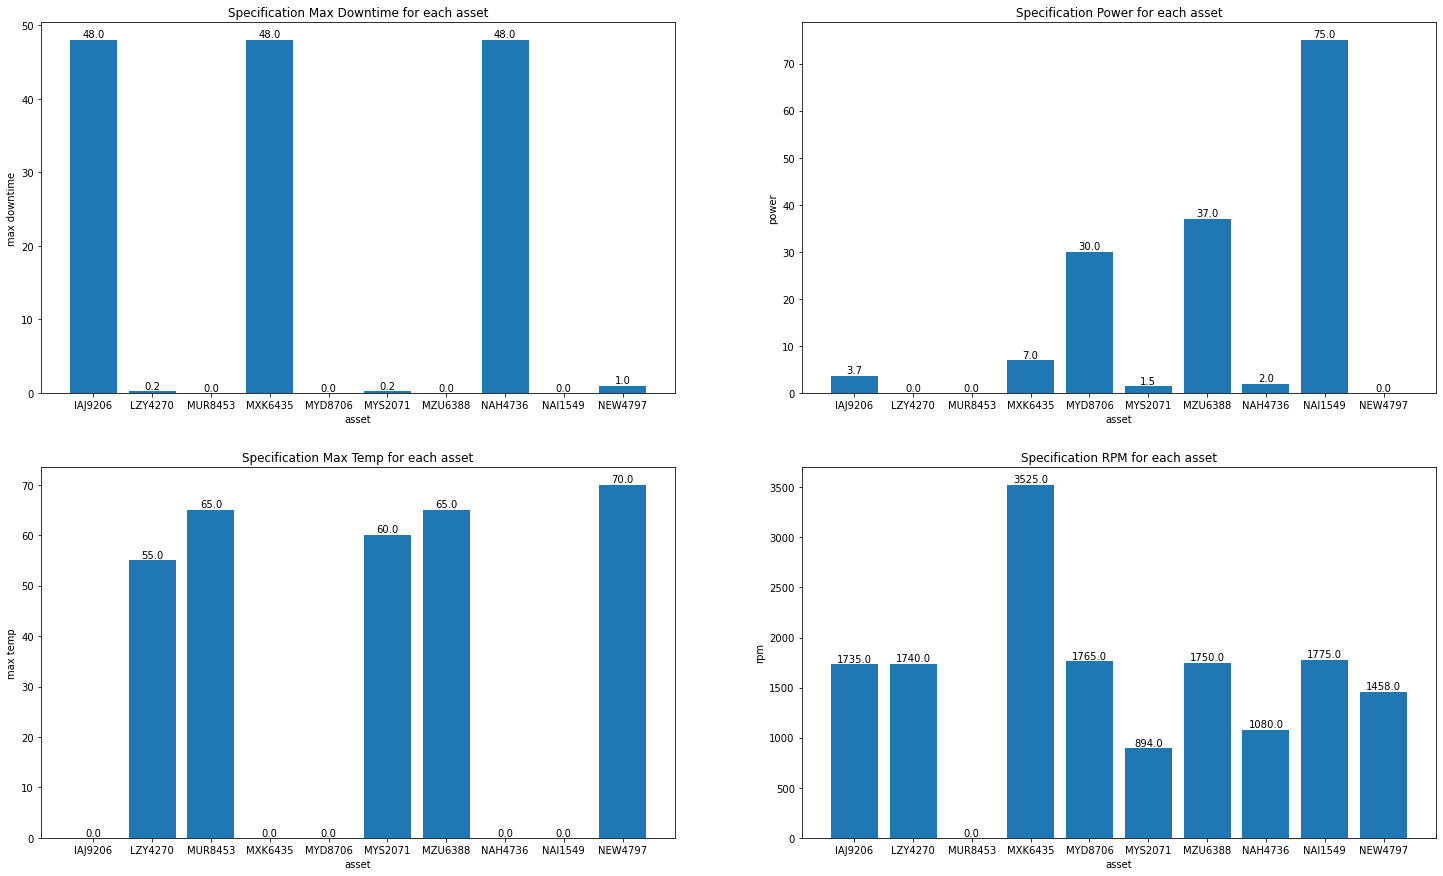

In [195]:
assets_plot = df_assets[['sensorId', 'specifications.maxDowntime', 'specifications.maxTemp', 'specifications.power', 'specifications.rpm']].fillna(0)

figure, axis = plt.subplots(2,2, figsize=(25,15))

#plt.xticks(range(len(assets_df.index)), list(plot_df.index))

axis[0][0].set_xlabel('asset')
axis[0][0].set_ylabel('max downtime')
axis[0][0].set_title('Specification Max Downtime for each asset')
plot = axis[0][0].bar(assets_plot.sensorId, assets_plot['specifications.maxDowntime'])
for rectangle in plot:
    height = rectangle.get_height()
    axis[0][0].text(rectangle.get_x() + rectangle.get_width() /2., 1.002 *
        height, '%.1f' % float(height), ha='center', va = 'bottom')


axis[1][0].set_xlabel('asset')
axis[1][0].set_ylabel('max temp')
axis[1][0].set_title('Specification Max Temp for each asset')
plot = axis[1][0].bar(assets_plot.sensorId, assets_plot['specifications.maxTemp'])
for rectangle in plot:
    height = rectangle.get_height()
    axis[1][0].text(rectangle.get_x() + rectangle.get_width() /2., 1.002 *
        height, '%.1f' % float(height), ha='center', va = 'bottom')
    
axis[0][1].set_xlabel('asset')
axis[0][1].set_ylabel('power')
axis[0][1].set_title('Specification Power for each asset')
plot = axis[0][1].bar(assets_plot.sensorId, assets_plot['specifications.power'])
for rectangle in plot:
    height = rectangle.get_height()
    axis[0][1].text(rectangle.get_x() + rectangle.get_width() /2., 1.002 *
        height, '%.1f' % float(height), ha='center', va = 'bottom')


axis[1][1].set_xlabel('asset')
axis[1][1].set_ylabel('rpm')
axis[1][1].set_title('Specification RPM for each asset')
plot = axis[1][1].bar(assets_plot.sensorId, assets_plot['specifications.rpm'])
for rectangle in plot:
    height = rectangle.get_height()
    axis[1][1].text(rectangle.get_x() + rectangle.get_width() /2., 1.002 *
        height, '%.1f' % float(height), ha='center', va = 'bottom')
    
plt.show()

## Question 2

Here, I will create a function to calculate uptime and downtime for each asset. The approach will be the following:

- Calculation of fft for velocity and acceleration for each asset
- Label the outliers of velocity and acceleration as cases that the machine doesn't worked (I will mark everything with magnitude above 0.99 percentile as outlier)
- Count the times that doens't worked and calculate downtime

In [357]:
from scipy.fft import rfft, fft
def fft_add(df):
    
    vel_fft = fft(df['vel'].dropna().reset_index(drop=True).values)
    accel_fft = fft(df['accel'].dropna().reset_index(drop=True).values)
    df = df.dropna().reset_index(drop=True)
    accel_mag = [a.real for a in accel_fft]
    vel_mag = [v.real for v in vel_fft]
    df['accel_fft'] = accel_mag
    df['vel_fft'] = vel_mag
    
    return df



for asset in assets:
    df_1_asset = df[df['sensorId'] == asset]
    df_fft = fft_add(df_1_asset[['vel', 'accel']])
    accel_out = df_fft[df_fft['accel_fft'] > df_fft['accel_fft'].quantile(.99)].index
    vel_out = df_fft[df_fft['vel_fft'] > df_fft['vel_fft'].quantile(.99)].index
    outliers = list(set(accel_out) & set(vel_out))
    downtime = len(outliers)/len(df_fft)
    print(asset+' Downtime was: %.5f'%(downtime))
    print(asset+' Uptime was: %.5f'%(1-downtime))
    print('\n')
    #df_fft.head()    
    

MYS2071 Downtime was: 0.00442
MYS2071 Uptime was: 0.99558


MYD8706 Downtime was: 0.00862
MYD8706 Uptime was: 0.99138


NAI1549 Downtime was: 0.01005
NAI1549 Uptime was: 0.98995


IAJ9206 Downtime was: 0.00942
IAJ9206 Uptime was: 0.99058


MXK6435 Downtime was: 0.00920
MXK6435 Uptime was: 0.99080


LZY4270 Downtime was: 0.00634
LZY4270 Uptime was: 0.99366


MZU6388 Downtime was: 0.00825
MZU6388 Uptime was: 0.99175


NAH4736 Downtime was: 0.00719
NAH4736 Uptime was: 0.99281


NEW4797 Downtime was: 0.00859
NEW4797 Uptime was: 0.99141


MUR8453 Downtime was: 0.00148
MUR8453 Uptime was: 0.99852




## Question 3

In order to detect the changes in pattern of vibration, I will apply a kmeans to the collects of each asset separately, then I will find two clusters, one with good values of vibration (by vibration I mean the FFT of velocity and acceleration in each axis) and other with bad values. This classification will help in the fourth question, by using this model to cluster new records of data.

In [203]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [376]:
full_df_fft = fft_add(df[df['sensorId'] == assets[0]][['sensorId', 'accel','vel']])

for asset in assets[1:]:
    new = fft_add(df[df['sensorId'] == asset][['sensorId', 'vel', 'accel']])
    full_df_fft = full_df_fft.append(new)
    #full_df_fft['sensorId'] = [asset]*len(new)


full_df_fft.head()


,sensorId,accel,vel,accel_fft,vel_fft
0,MYS2071,0.128508,0.003051,601.367077,13.657113
1,MYS2071,0.120231,0.002414,-4.084868,-0.185168
2,MYS2071,0.124341,0.002739,0.417731,0.048365
3,MYS2071,0.124292,0.002467,-2.727978,-0.107698
4,MYS2071,0.122194,0.002421,-0.227758,-0.066283


In [379]:
df_kmeans = full_df_fft[['sensorId','accel_fft', 'vel_fft']]
df_kmeans

,sensorId,accel_fft,vel_fft
0,MYS2071,601.367077,13.657113
1,MYS2071,-4.084868,-0.185168
2,MYS2071,0.417731,0.048365
3,MYS2071,-2.727978,-0.107698
4,MYS2071,-0.227758,-0.066283
...,...,...,...
2022,MUR8453,-0.120532,0.025841
2023,MUR8453,-0.846952,-0.035169
2024,MUR8453,-0.105501,-0.005234
2025,MUR8453,1.644496,0.043808


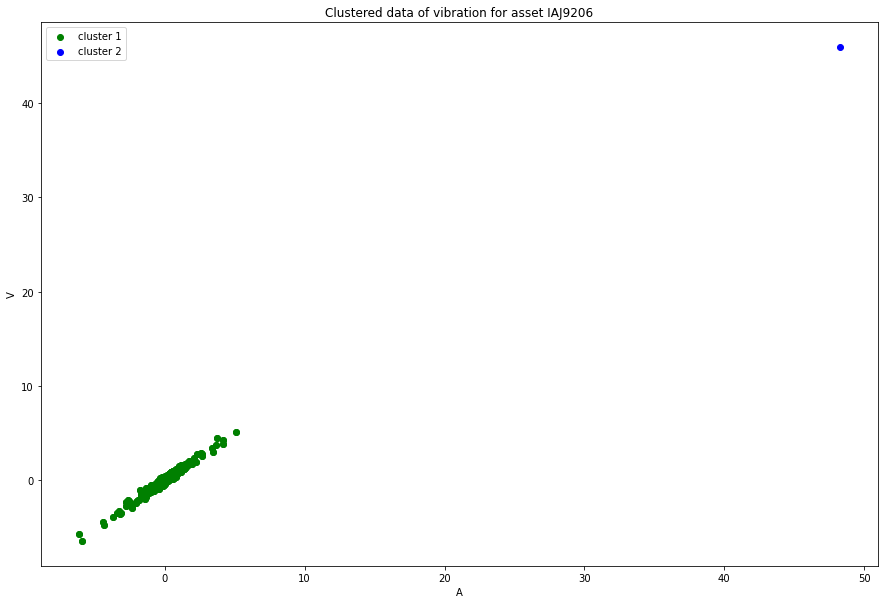

In [381]:
def kmeans_apply(df, asset, k=2):
    df_final = df[df['sensorId'] == asset].drop(['sensorId'], axis=1)
    df_final.dropna(inplace=True)
    X = df_final.values
    
    X_std = StandardScaler().fit_transform(X)
    
    km = KMeans(n_clusters=2, max_iter=100)
    
    km.fit(X_std)
    centroids = km.cluster_centers_
    return X_std, km.labels_, centroids
    


X_std, labels, centroids = kmeans_apply(df_kmeans, 'IAJ9206')
plt.figure(figsize=(15,10))
plt.scatter(X_std[labels == 0, 0], X_std[labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[labels == 1, 0], X_std[labels == 1, 1],
            c='blue', label='cluster 2')


plt.legend()


plt.xlabel('A')
plt.ylabel('V')
plt.title('Clustered data of vibration for asset %s'%('IAJ9206'))
plt.show()

We can generalize this approach for others assets. In order to use the best K value, the one that minimize sum squared error, I would use the Elbow method (I will talk more about that in the questions), but here I will always want two clusters, with one representing the changes in pattern and the other representing the pattern.

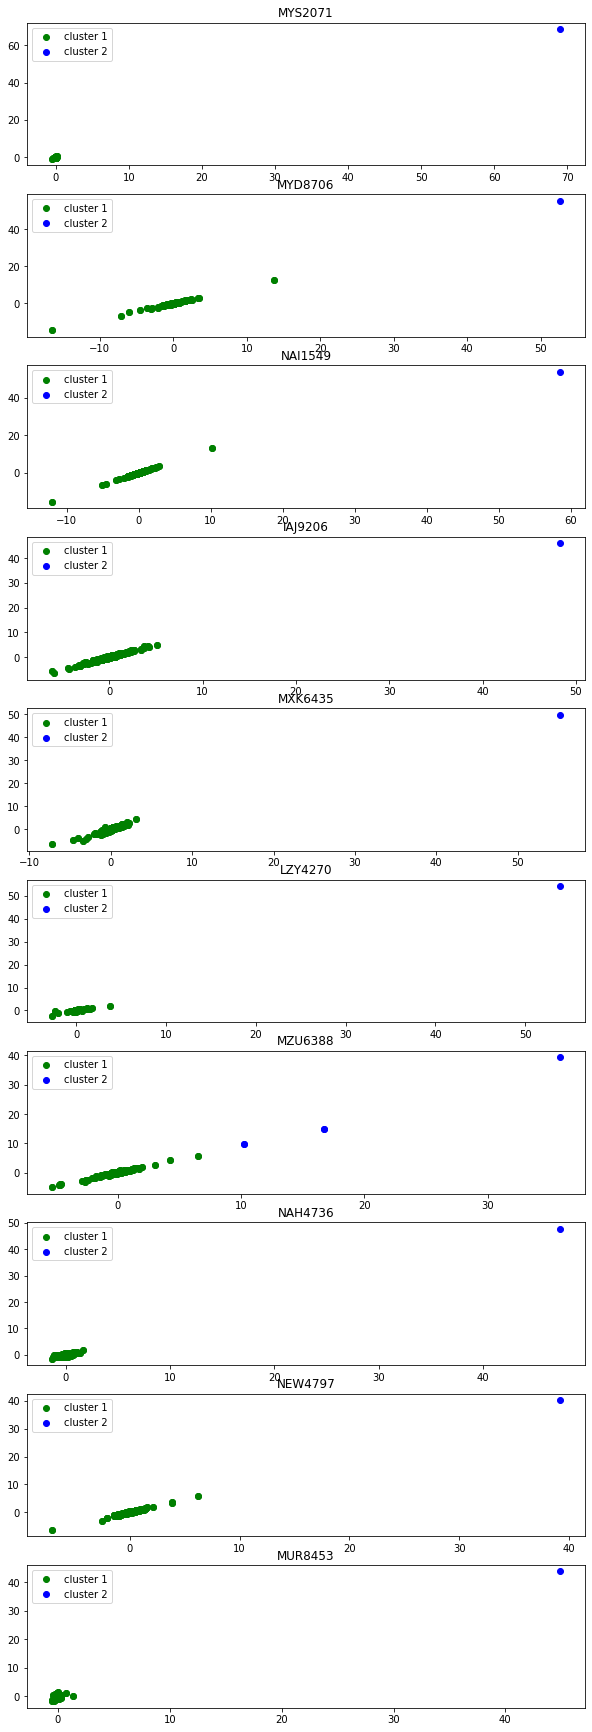

In [383]:
fig, axis = plt.subplots(len(assets), 1, figsize=(10,31))
for (asset, ax) in zip(assets, axis):
    X_std, labels, centroids = kmeans_apply(df_kmeans, asset)
    
    ax.scatter(X_std[labels == 0, 0], X_std[labels == 0, 1],
                c='green', label='cluster 1')
    ax.scatter(X_std[labels == 1, 0], X_std[labels == 1, 1],
                c='blue', label='cluster 2')
    

    ax.legend()

    ax.set_title(asset)
    
#plt.title('Clustered data of vibration for asset %s'%('IAJ9206'))
plt.show()

## Question 4

The approach here will be very simple: I will train the kmeans for the desired asset, and predict the label for the new record. I will classify the class with more records as the **pattern** class, and the class with less records as the **failure class**.

Let's exemplify that with with the asset IAJ9206:

In [386]:
df_final = df_kmeans[df_kmeans['sensorId'] == 'IAJ9206'].drop(['sensorId'], axis=1)
df_final.dropna(inplace=True)
X = df_final.values

X_std = StandardScaler().fit_transform(X)

km = KMeans(n_clusters=2, max_iter=100)

km.fit(X_std)

KMeans(max_iter=100, n_clusters=2)

In [387]:
df_final['cluster'] = km.predict(X_std)
df_final.head()

,accel_fft,vel_fft,cluster
0,156.636154,5.196384,1
1,6.860208,0.266975,0
2,-7.478123,-0.333352,0
3,6.426934,0.187079,0
4,-11.863258,-0.438636,0


In [388]:
print('The pattern class is the class %d and the failure class is the class %d'%(df_final.cluster.value_counts().index[0],df_final.cluster.value_counts().index[1]))

The pattern class is the class 0 and the failure class is the class 1


Let's test for a new record from another sensor:

In [392]:
test = full_df_fft.tail()[['accel', 'vel']].values[0]
test_fft = full_df_fft.tail()[['accel_fft', 'vel_fft']].values[0]

print('Test acceleration is %.3f and test velocity is %.5f'%(test[0], test[1]))

pred_class = km.predict([test_fft])

if pred_class == 0:
    print('Test is in pattern!')
else:
    print('Test is failure!')

Test acceleration is 0.047 and test velocity is 0.00059
Test is in pattern!


# Part 3

In this last part, I'll answer some questions about Data Science area. As the questions were made in portuguese, I will answer this in portuguese too.

**Q1 - O que é um 'viés de seleção'?**

**R1:** Primeiro, é importante definir viés como a diferença entre o valor estimado pelo modelo e o valor real, tendo isso claro, o viés de seleção é o tipo de viés que é resultado da seleção da amostra da população escolhida. Isto é, o grupo escolhido como representante da população no modelo na verdade não representa todas as características da população, o que gera um erro. 

Como exemplo, podemos falar de um caso onde uma pesquisa é feita para verificar se há o interesse na compra de um produto usando a opinião de voluntários. Em geral, quem se voluntaria tende a se interessar mais pelo problema relacionado ao produto e por isso provavelmente terá maior chance de gostar dele. Por isso, haveria um viés de seleção na pesquisa.



**Q2 - O que é uma 'análise de poder'?**

**R2:** É preciso definir alguns conceitos para falar sobre análise de poder:

* Teste de hipótese, procedimento estatístico que visa tomar uma decisão (aceitar ou rejeitar uma hipótese H0) usando uma amostra de uma população
* Hipótese nula, é a hipótese H0, que se tenta provar a falsidade no teste
* Se a hipótese nula for rejeitada e ela for verdadeira, temos um **Erro do Tipo 1** (falso positivo)
* Se a hipótese nula for aceita e ela for falsa, temos um **Erro do Tipo 2** (falso negativo)
* Poder, que é a probabilidade de um teste rejeitar corretamente a hipótese nula (o teste rejeita e ela é falsa)
* Efeito de tamanho, que é o quanto uma variável está afetando na outra na análise de um problema (pode ser medido de diversas formas, como correlação ou regressão)
* Nível de significância ($\alpha$), probabilidade de rejeitar a hipótese nula quando ela é verdadeira

Considerando isso, a ideia da análise de poder é, tendo três de quatro métricas já citadas (nível de significância, efeito de tamanho, poder e tamanho da amostra), estimar a quarta. Em geral, é usada para estimar o tamanho mínimo de amostra já que podemos definir anteriormente o nível de significância, o efeito de tamanho e o poder desejados. 

**Q3 - O que é melhor, ter bons dados ou construir bons modelos?**

**R3:** Definirei bons dados como:

* Dados na quantidade ideal para resolver o problema (não necessariamente precisamos de muito dado)
* Dados não enviesados (como já foi explicado na primeira questão)
* Dados sem erros de coleta

Considerando isso, é mais importante ter **bons** dados do que bons modelos, visto que para definir um bom modelo é preciso dos dados na forma como foi definido. Também podemos ressaltar que há um conjunto de algoritmos usados em diversos dados diferentes, e cada um precisa de sua respectiva parametrização. Isso é o que forma o modelo. Sem bons dados, por melhor que seja a parametrização do algoritmo, não chegaremos em um bom modelo. 

**Q4 - Quais são as maneiras de definir o número de clusters em um algoritmo de clustering? Como saber se o resultado obtido foi satisfatório?**

**R4:** O método que eu mais uso é o método chamado de 'Elbow Method', que consiste em tirar a soma do erro quadrático do modelo para diversos valores de K diferentes, e, ao plotar em linha, verificar qual é o valor de K em que há uma "dobra" da curva. O gráfico fica parecendo um cotovelo, e o ponto escolhindo é como se fosse a ponta do cotovelo.

<img src="elbow.png" width="400" height="200">

Nesse caso, por exemplo, o ponto escolhido é K=2. Como esse método é de inspeção visual, pode não ser o ideal se a ideia é treinar clusters de forma automática. Portanto, outro método que pode ser usado é o de silhuetas:

$$
Silhouette Score = \dfrac{(b^i - a^i)}{max(a^i, b^i)}
$$

No qual $b^i$ é a distância entre todos os pontos de dados no cluster mais próximo e $a^i$ é a distância entre todos os pontos no mesmo cluster. Esse número vai ficar entre [-1, 1], no qual 1 significa que a amostra está longe de outros clusters e está no cluster dela (ideal). O método então acha os valores de _Silhouette Score_ para vários valores de K diferentes, o com maior Silhouette Score médio é escolhido.

Na questão que fiz anteriormente, usando o KMeans, não apliquei esses métodos porque propositalmente queria fazer com apenas dois clusters, um representando falha e outro padrão.